# Data Cleaning and Exploration


## Table of Contents:
1. [Important Information](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Important-Information)
2. [Unpickle the Data](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Data-Cleaning)

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using wiki_musicians.py.  I manually cleaned the text file to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using lyricsgenius_requests.ipynb, where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl, not uploaded in the repo) in the [load_json_to_df.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/2_load_json_to_df.ipynb) script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into multiple scripts to avoid re-running time-intensive queries.

### Progress Report Info:
This script represents the end of Progress Report 1 and the main body of Progress Report 2.  PR1 was split into multiple scripts/notebooks so that data collection steps wouldn't be re-run.

## Unpickle the Data

In [1]:
import pickle
f = open('../data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
Before cleaning, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists. I sense there are a number of "null" lyrics, given that nearly 200 entries are not unique.  This may also be explained by duplicates (though I wouldn't expect exact duplicates for non-null lyrics).

In [5]:
# Find duplicates
len(lyricsdf[lyricsdf.lyrics == ""])

202

In [6]:
lyricsdf.lyrics.duplicated().value_counts()

False    3187
True      201
Name: lyrics, dtype: int64

201 lyric entries are duplicates of other entries, and 202 lyric entries are empty strings.

In [7]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


In [8]:
lyricsdf.artist.value_counts()

Wesley Willis        561
Jandek               351
Daniel Johnston      316
Viper                261
Brian Wilson         237
                    ... 
Damião Experiença      1
Mrs. Miller            1
Dr. Demento            1
Sky Saxon              1
Lucia Pamela           1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  Obviously, this may skew the analysis toward "Wesley Willis" music and away from the more general "Outsider Music" genre.  I will wait until my data is fully cleaned before making any judgments on how to deal with this potential skew.

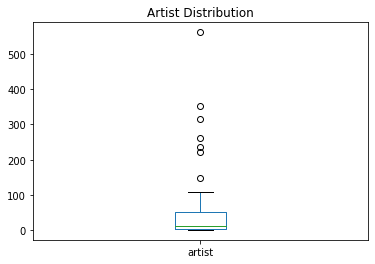

In [9]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Artist Distribution")

This box plot is probably the cleanest way to visualize the artist distribution: there are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

**Progress Report 2 starts here**

As I move forward with data cleaning, I will need to first take care of the "*Song Title* Lyrics" issue present at the beginning of most (if not all) of the lyrics in the dataset, then strip whitespace from the ends of the lyric text and handle "\n" within the lyric body.  I will also replace all empty strings "" with null values, so that they can be excluded from analysis later.  I will then take a closer look at remaining duplicates and try to weed out any non-lyrical entries.

In [10]:
# cycles through rows, removes the *Song Title* Lyrics from beginning
def removeTitle(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        toRemove = row.title + " Lyrics"
        row.lyrics = row.lyrics.replace(toRemove, "")
        i = i+1

In [11]:
removeTitle(lyricsdf)

In [12]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"\nTerrible things, always happening\nJust like..."
1,Abner Jay,Cocaine,\nFolk music is high-class music. There's a lo...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,\nTerrible things; that's what's getting all t...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


Let's get rid of those 202 empty strings and replace with null vlaues.

In [13]:
lyricsdf = lyricsdf.replace("", None)

In [14]:
len(lyricsdf[lyricsdf.lyrics == ""])

0

Note below that there are still duplicates.  After removing the song titles, lyrical entries like "Transcription in progress" and "Embed" are now identical, in addition to the None values added in.  It is difficult to tell, however, why some of these other entries are appearing as duplicates

In [15]:
lyricsdf[lyricsdf.lyrics.duplicated()].tail(20)

,artist,title,lyrics
23,The Red Krayola,Piece for Piano and Guitar,Historic locomotion in\nSectional activation\n...
33,The Red Krayola,The Jewels of thre Madonna,Neevr let it be said that this is swill\nI'm g...
36,The Red Krayola,Tina’s Gone to Have a Baby,The master tours the garden in a coach\nI see ...
10,The Shaggs,Shaggs’ Own Thing (Musical Version),"\nOh, the rich people want what the poor peopl..."
17,The Shaggs,Wheels,"What should I do?\nWhat should I do?\nTell me,..."
1,Tonetta,81 Inch Prime Ass (Tonetta),I'm going to tickle your ass\nWith my tongue\n...
79,Viper,"Hop It, Drop It","\nHop it, drop it\nDon't hurt it, work it\nHop..."
113,Viper,In the Life of the Top-Choice Assassin,"\nIn the life of a baller\nShot-caller, hater ..."
127,Viper,Jackers Mad,Transcription in progress by Viper Crackpostin...
156,Viper,No 1 Had A Clue,\nGirls love me cause I'm so real\nCause I'm l...


In [16]:
# strip whitespace from the beginning and end
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.strip("\n"))

In [17]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [18]:
# I noticed that .loc[] worked on indexes the restart for individual artists.  This doesn't seem super useful.
lyricsdf.loc[46]

,artist,title,lyrics
46,Ariel Pink,Function,What's the function of your soul\nWhat's the f...
46,Brian Wilson,Dream Angel,I'm holding you as you sleep\nI get this feeli...
46,Daniel Johnston,Despair Came Knocking,Despair came knocking at my door\nAnd I let he...
46,Gary Wilson,Lonely Holiday (Intro),Holiday\nA holiday\nIt's a holidayEmbed
46,Hasil Adkins,Woke Up This Morning,I got up this morning\nYeah when I woke up thi...
46,IceJJFish,So Sweet,Baby you look so sweet\nBaby girl put that bod...
46,Jandek,Comedy,Here's looking at you kid\nYou got the German ...
46,John Frusciante,Dying (I Don’t Mind),Here's one for the unknown past\nShooting into...
46,John Maus,Love Letters From Hell (2007),"Well I'm fillin in for Gracie Roberts tonight,..."
46,Moondog,Oboe Round,"No, the wheel was never invented\nNo, no, no, ..."


In [19]:
# fix the indexing -- it probably won't be super useful to have each individual musician's songs
# indexed from 0-n.  This makes sure everything has a unique index
lyricsdf = lyricsdf.reset_index()
lyricsdf = lyricsdf[['artist', 'title', 'lyrics']]
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [20]:
lyricsdf.tail()

,artist,title,lyrics
3383,William Shatner,Together,He says Phoenix\nPegasus\nGrecian urn\nMidwest...
3384,William Shatner,Twilight Zone,(Somewhere in a lonely hotel room\nThere's a g...
3385,William Shatner,Walking on the Moon,Giant steps are what you take\nI hope my legs ...
3386,William Shatner,What Have You Done,She was underwater\nIn the shadows\nWas it the...
3387,William Shatner,You’ll Have Time,"Live life, live life like you're gonna die\nBe..."


In [21]:
# William Shatner "You'll Have Time" ends in "2Embed"
lyricsdf.iloc[-1].lyrics[-50:]

' airplane crash\nCar wreck, a cap in your ass2Embed'

In [22]:
# Randomly samples from lyrics & shows ending, check what "Embed"s look like
embedtest = lyricsdf.lyrics.sample(5)
for lyrics in embedtest:
    print(lyrics[-50:])

my love
All my love
All my love
I send to youEmbed
ck, baby
 But I've made it
 To paint my teethEmbed
n Chicago
Pizza Hut, stop and smell the pizzaEmbed
 ???
Take the ???
Take it your black disgraceEmbed
he little kid's in the dog pound
IndefinitelyEmbed


After running the code chunk above multiple times, I've seen a few features of the "Embed" issue at the tail of the lyrics:
- No space before "Embed"
- Occasionally (but rarely), there is a digit before (e.g., "1Embed")
    - After checking some lyrics on the Genius site, I found that this number corresponds to the "PYONG"s on the lyrics.  This is sort of like a favoriting/sharing function, but for now, it's sort of unimportant.
    
Both the "Embed" and the preceding digit, if present, should be removed.  There is some risk that removing the digit will delete a digit at the end of the lyrics, but I judge that, in this case, losing a digit is preferable to including extraneous data.


In [23]:
# Remove the nEmbed using a regex
def removeEmbed(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        embed = row.lyrics
        row.lyrics = re.sub(r'\d*Embed', "", embed)
        #print(row.lyrics[-50:])
        i = i+1

In [24]:
removeEmbed(lyricsdf)

In [25]:
# replaces newlines with spaces, but maintains the line-break data in a separate column
lyricsdf["lyrics_lines"] = lyricsdf.lyrics
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\n", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ..."


In [26]:
# The end is looking pretty good, too! No Embed, no newlines
for lyrics in lyricsdf.lyrics[:5]:
    print(lyrics[-50:])

it with you, honey Bring it with you when you come
heart And it runnin', oh it runnin' Round my brain
nd then running Lord, it's running Round my brain 
with me baby And I declare, I declare I am through
back tonight And then I'll kiss and hold you tight


Some lyrics are not in English characters.  While sampling, I saw at least one song written in Japanese characters.  I'll tag these in a separate "English_char" column, but won't remove them for now.  There is the possibility that there are foreign language songs written in English characters that won't be recognized by this step.  Given the nature of the data, I sense there may also be some "non-English" nonsense songs.  I'll leave these in, as well, and will leave them untagged (for now), under the assumption that they do not make up a good portion of the data.

In [27]:
# This is not English :)
lyricsdf.iloc[1915].lyrics

'En dag när jag gick i en skog Så tappade jag mina byxor Jag märkte det ej Men jag mötte en tjej Och hon tittade så konstigt på mig Men så sa hon hej ... ... Och sen så gick jag hem'

The code below was taken from this [stack overflow page](https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python).  It should identify non-English characters not found in ASCII.

In [28]:
# [1915] is not English for sure
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [29]:
# Good job! That was, indeed, not English :)
isEnglish(lyricsdf.iloc[1915].lyrics)

False

In [30]:
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [31]:
# That's a lot of non-English songs. Hmm...
lyricsdf.eng_chars_only.value_counts()

True     2269
False    1119
Name: eng_chars_only, dtype: int64

In [32]:
# These look pretty English to me.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

608     Last song for you Last song for you You were a...
1819    Paris, Paris Mais qui, mon petit Mais qui, mon...
2582    It's gon' be crunk tight We hitting VIP tonigh...
3161    You are so nice to me You are a good person Yo...
451     O Fortuna velut luna  unleash Adry   Mongella ...
2960    You are so pretty like a flower You are so bea...
2415    Chorus I love you dear Why can’t you hear Plea...
49      Santa Clarita, Ventura, Palos Verdes, San Clem...
718     She walked into the room Suddenly I felt fat I...
821     Lisa made me cry I know the reason why She tol...
Name: lyrics, dtype: object

In [33]:
# it looks like there are \u2005 characters (they don't appear as anything on the site)
lyricsdf.iloc[3175].lyrics

"This band rocked the Czar bar About 180 people were at the show The rock show was\u2005a\u2005rock 'n roll\u2005experience It was a great knockout  The Dollrods The\u2005Dollrods The Dollrods The Dollrods  The band played it on The band got down like a Magikist They can really rock the nation They can really jam the guitar  The Dollrods The Dollrods The Dollrods The Dollrods  The show was a rock 'n roller The jam session was a big rock 'n roll blast The jam session was kick ass show They can really knock it out The Dollrods The Dollrods The Dollrods The Dollrods  Rock over London, rock on Chicago Diet Pepsi, uh-huh!"

It looks like there may be a different kind of space formatting on some of the lyrics.  We'll replace them the same way the newlines were replaced.

In [34]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u2005", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u2005", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [35]:
# Re-run the eng_chars_only column, see if .value_counts() has changed
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2581
False     807
Name: eng_chars_only, dtype: int64

The number of songs with non-English characters has gone down significantly, but it's still worth checking to see if there are other whitespace characters (or similar issues) that may be causing over-tagging.

In [36]:
# Uh-oh.  Stil pretty English.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

1895    Är det du som välte min höstack? Är det du som...
3086    You are my sweet honey love You are my shining...
1607    Unscorch the ground and look around unpack a p...
845     So long ago, but far away I walked down the be...
3184    This band played at the Double Door About 500 ...
2703    You are Carla's mother You are my friend You a...
496     I wanted to be free But there was nothing left...
2969    This is a rock 'n roll club It is a place wher...
1863    The trumpet will sound the most beautiful melo...
859     Last night, I had a dream I had a dream about ...
Name: lyrics, dtype: object

In [37]:
# Starting to think maybe tagging non-English songs is a bit fruitless
# But that \u2005 space issue was a good catch, at least!
lyricsdf.iloc[1020].lyrics

'Why don’t you sell me two rhymes I want to tell you two times'

In [38]:
# Another space formatting issue
lyricsdf.iloc[2734].lyrics

"This band played at the Empty Bottle About two hundred fifty people were at the rock show The jam session was perfect The rock 'n roll burned a monkey up  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The band played it on The\u205fband\u205fgot\u205fdown like a\u205fMagikist The crowd roared\u205flike a lion The jam session whooped a llama's ass  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The show was over A lot of people met the band The rock 'n roll show was awesome It whipped a pony's ass with a belt Brain Kiss Brain Kiss Brain Kiss Brain Kiss  Rock over London, rock on Chicago Radio Shack, you got questions, we got answers"

In [39]:
# Fix the \u205f spacing
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u205f", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u205f", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [40]:
# count decreases, yet again!
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2794
False     594
Name: eng_chars_only, dtype: int64

In [41]:
# Catching a lot more actual non-English lyrics, so we might be close to catching all of the formatting issues.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

2550    Motherfuck yo record label, trick Motherfuck y...
2457    Money game crazy My crib game crazy My model g...
1299    It turned night time on me All of a sudden it’...
2614    Pussy nigga lyin' on yo thang Claimin' that yo...
190     Should old acquaintance be forgot And never br...
2078    It seems like a bell rings time and Déjà vu Ev...
673     Hi, how are you?  Every morning he got up Drea...
1934    Var det du som kom i går? Var det du som satte...
826     Lugene kissed Gary last night, oh no Lugene ki...
1364    I’m gonna beat you down I’m gonna knock you do...
Name: lyrics, dtype: object

In [42]:
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev\'ry time I climb up to Paradise How many times I\'ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There\'s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I\'m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn\'t any sacrifice We\'re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover\'s Ledge above If you\'ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

Note that the straight apostrophe (') is being escaped here.  In other lyrics, the apostrophe is formatted as the curly ’.  I will try standardizing the apostrophe to the curly version below.

In [43]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\'", "’"))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\'", "’"))
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev’ry time I climb up to Paradise How many times I’ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There’s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I’m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn’t any sacrifice We’re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover’s Ledge above If you’ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

In [44]:
# the ellipsis here is specially formatted as "…"
lyricsdf.iloc[2522].lyrics

'To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome  Don’t get sent home In a body bag for not leaving me alone I don’t care what you got goin on Cuz i already paid and my body is every bone Yea i know, that I’m conceited and arrogant And that can be repeated But that’s just my personality And it’s magnified cuz im a G So i ain’t trying to hear what they gotta say Like they ? for a jack, so i ? the gun spray These marks are fucking up my day Rollin up asking if they may Ask me a question about some bullshit Bitch ass nigga you better get a grip I’m tired of playing with these faggots I’m bout to get my four and let you snitch niggas have it To yo dome with the chrome To yo dome with the chrome To yo dome with the chro

In [45]:
# replace special ellipsis with plain "..."
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("…", "..."))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("…", "..."))
lyricsdf.iloc[2522].lyrics[-400:-200]

'ck on a mission But wondering when this green gon’ stop coming in I’ll go... To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with'

I'm going to search the lyrics for "\\" to see if there are any other formatting issues present.

In [46]:
# It look like there are not "\" formatting issues left
i=0
while i != len(lyricsdf):
    x = re.findall(r"\\", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

From earlier, I remember seeing "Transcription in progress ..." lyric entries.  I'd like to set these as null.

In [47]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']


In [48]:
# There are 6!
i=0
transcript_del = []
while i != len(lyricsdf):
    if "Transcription in progress" in lyricsdf.iloc[i].lyrics:
        transcript_del.append(i)
    i= i+1

In [49]:
for i in transcript_del:
    print(lyricsdf.iloc[i].lyrics)

Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins


In [50]:
# They're all the same string, so:
lyricsdf.lyrics = lyricsdf.lyrics.replace("Transcription in progress by Viper Crackposting admins", None)

In [51]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

Because some English songs contain non-English characters, the eng_chars_only column isn't very useful at the moment.  However, it did help significantly with catching other formatting issues that I had not anticipated.  I will consider the data clean for the moment.

Note, also, that the data remains very Zipfian in terms of artists.  For now, I will leave it as such.  As a disclaimer, the Wesley Willis skew sort of represents the "poster child" of outsider music, so the analysis may feed into the ideology surrounding the genre.

## Beginning Analysis
The lyrics need to be tokenized so that they can be analyzed at the word-level.

In [52]:
# rudimentary tokenization -- lower beforehand for now--I'll fix this next time if I notice it's messing things up
lyricsdf["tokens"] = lyricsdf.lyrics.map(lambda x: x.lower())
lyricsdf.tokens = lyricsdf.tokens.map(lambda x: nltk.word_tokenize(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,tokens
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,"[terrible, things, ,, always, happening, just,..."
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,"[folk, music, is, high-class, music, ., there,..."
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,"[cocaine, ,, cocaine, running, round, my, hear..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,"[terrible, things, ;, that, ’, s, what, ’, s, ..."
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,"[i, ,, i, cried, i, cried, in, the, ni-ight, o..."


In [53]:
lyricsdf["token_ct"] = lyricsdf.tokens.map(len)
lyricsdf["type_ct"] = lyricsdf.tokens.map(lambda x: len(set(x)))
lyricsdf["TTR"] = lyricsdf.type_ct / lyricsdf.token_ct
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,tokens,token_ct,type_ct,TTR
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,"[terrible, things, ,, always, happening, just,...",429,143,0.333333
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,"[folk, music, is, high-class, music, ., there,...",501,195,0.389222
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,"[cocaine, ,, cocaine, running, round, my, hear...",443,169,0.381490
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,"[terrible, things, ;, that, ’, s, what, ’, s, ...",733,265,0.361528
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,"[i, ,, i, cried, i, cried, in, the, ni-ight, o...",152,51,0.335526


In [54]:
lyricsdf.token_ct.describe()

count    3388.000000
mean      208.628099
std       160.661312
min         0.000000
25%       114.000000
50%       169.000000
75%       258.000000
max      2155.000000
Name: token_ct, dtype: float64

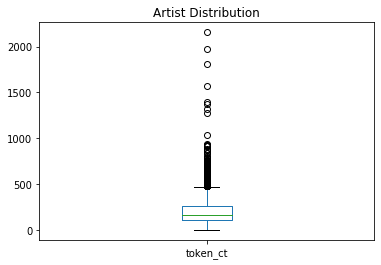

In [55]:
# Let's take a quick look at the token_ct distribution
lyricsdf.token_ct.plot(kind = "box", rot=0, title = "Artist Distribution")

There are some lyrics with around 2,000 tokens!  This seems unusual.  Let's investigate... could this be a tokenization issue?  Note that, on average, most songs are about 200 tokens long, which seems a bit more reasonable.

In [56]:
lyricsdf[lyricsdf.token_ct >= 2000]

,artist,title,lyrics,lyrics_lines,eng_chars_only,tokens,token_ct,type_ct,TTR
1242,Jandek,One Last Chance,I need another chance I need one last chance I...,I need another chance\nI need one last chance\...,True,"[i, need, another, chance, i, need, one, last,...",2155,325,0.150812


In [57]:
lyricsdf.iloc[1242].lyrics

'I need another chance I need one last chance I’ve looked at myself I don’t like what I see I need another chance To try to do it right I can do it right If I have the strength If I keep my will If I direct my body I can do it right I need another chance Because I looked at myself And I’m goin wrong But I can do it right You can show me how Like you did before When I really needed to do it right I was in a fix before I was really in trouble It was sharp and quick It took me by surprise And you helped me then It was a matter of time But this time it’s different It’s been a growing thing It wasn’t sharp and quick No no no no It didn’t take me by surprise It came along slow and soft It crept and I saw it all along the way It came on bit by bit And I knew it all along The only difference is now It’s gone too far It’s gone too far It almost seems irreversible I need another chance I wanna do it right Cause when I looked at myself It was going all wrong I’ve got to change my style I’ve got t

This is actually pretty long.  (It's a 30-minute video on YouTube!!!)  But the other songs are still worth investigating further.  I'll look into that for the next progress report!